# Trabajo Práctico 2

## Page Rank de Actores y Actrices

In [1]:
import os
from bs4 import BeautifulSoup

wd = os.getcwd()
if 'TP2' not in wd: wd += '/TP2'

DIR = f'{wd}/paginas'
PAGINAS = os.listdir(DIR)

links = [] # Lista de tuplas de src->dst
palabras = {} # Dict de pagina: palabras

for f in PAGINAS:
    with open(os.path.join(DIR, f)) as file:
        soup = BeautifulSoup(file.read())
        palabras[f] = soup.get_text().split()

        for link in soup.find_all('a'):
            dst = link.get('href').replace('http://','')
            links.append((f,dst))

links

[('angelinajolie.html', 'jonvoight.html'),
 ('angelinajolie.html', 'bradpitt.html'),
 ('bradpitt.html', 'jenniferaniston.html'),
 ('bradpitt.html', 'angelinajolie.html'),
 ('bradpitt.html', 'martinscorcese.html'),
 ('bradpitt.html', 'angelinajolie.html'),
 ('jonvoight.html', 'angelinajolie.html'),
 ('jonvoight.html', 'angelinajolie.html'),
 ('jonvoight.html', 'bradpitt.html'),
 ('robertdeniro.html', 'martinscorcese.html')]

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {
    'figure.figsize': (10, 6),
}
pylab.rcParams.update(params)

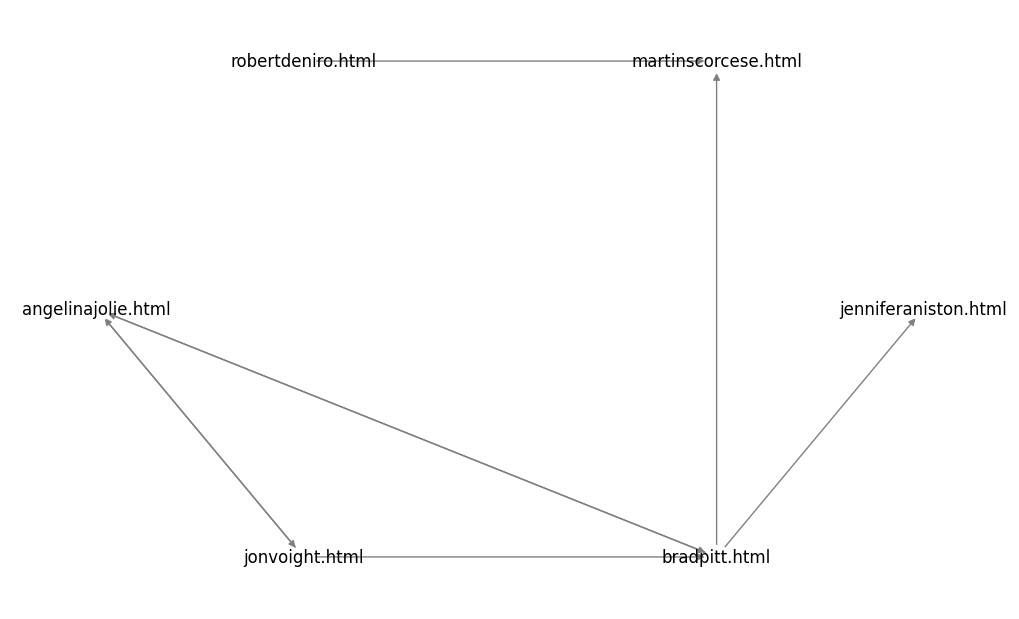

In [3]:
import networkx as nx

G = nx.DiGraph()
G.add_edges_from(links)
nx.draw_shell(G, with_labels=True, node_color='white', edge_color='grey')

In [4]:
matriz_ady = nx.to_pandas_adjacency(G)
matriz_ady

,angelinajolie.html,jonvoight.html,bradpitt.html,jenniferaniston.html,martinscorcese.html,robertdeniro.html
angelinajolie.html,0.0,1.0,1.0,0.0,0.0,0.0
jonvoight.html,1.0,0.0,1.0,0.0,0.0,0.0
bradpitt.html,1.0,0.0,0.0,1.0,1.0,0.0
jenniferaniston.html,0.0,0.0,0.0,0.0,0.0,0.0
martinscorcese.html,0.0,0.0,0.0,0.0,0.0,0.0
robertdeniro.html,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
suma_filas = matriz_ady.sum(axis=1)
matriz_page_rank = matriz_ady.div(suma_filas, axis=0)
matriz_page_rank.fillna(1/len(PAGINAS), inplace=True)
matriz_page_rank

,angelinajolie.html,jonvoight.html,bradpitt.html,jenniferaniston.html,martinscorcese.html,robertdeniro.html
angelinajolie.html,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000
jonvoight.html,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000
bradpitt.html,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000
jenniferaniston.html,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
martinscorcese.html,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
robertdeniro.html,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [6]:
import numpy as np

# Hacemos N iteraciones de la matriz
iteraciones = np.linalg.matrix_power(matriz_page_rank, 50)

page_rank = {p: iteraciones[0][i] for i, p in enumerate(matriz_page_rank.index)}
page_rank

{'angelinajolie.html': 0.2162162162162164,
 'jonvoight.html': 0.16216216216216114,
 'bradpitt.html': 0.2432432432432427,
 'jenniferaniston.html': 0.13513513513513484,
 'martinscorcese.html': 0.18918918918918878,
 'robertdeniro.html': 0.05405405405405395}

In [7]:
import random

BUSQUEDAS = 20

todas_palabras = set()
for p in palabras.values():
    todas_palabras.update(p)

for p in random.choices(list(todas_palabras), k=BUSQUEDAS):
    matches = [f for f in PAGINAS if p in palabras[f]]
    print(f"'{p}' aparece en: {sorted(matches, key=lambda x: -page_rank[x])}")

'conflicted,' aparece en: ['robertdeniro.html']
'landmark' aparece en: ['martinscorcese.html', 'jonvoight.html']
'Miller' aparece en: ['angelinajolie.html']
'preservation' aparece en: ['martinscorcese.html']
'Niro.[2]' aparece en: ['martinscorcese.html']
'founder' aparece en: ['martinscorcese.html']
'hit' aparece en: ['bradpitt.html']
'best' aparece en: ['robertdeniro.html']
'Marcantonio' aparece en: ['martinscorcese.html']
'Roman' aparece en: ['martinscorcese.html']
'earned' aparece en: ['bradpitt.html', 'martinscorcese.html', 'jonvoight.html']
'motion' aparece en: ['martinscorcese.html']
'method' aparece en: ['robertdeniro.html']
'director' aparece en: ['robertdeniro.html']
'Life' aparece en: ['martinscorcese.html']
'While' aparece en: ['jenniferaniston.html']
'School' aparece en: ['martinscorcese.html']
'Vivienne.' aparece en: ['bradpitt.html', 'angelinajolie.html']
'low-budget' aparece en: ['angelinajolie.html']
'17,' aparece en: ['martinscorcese.html', 'robertdeniro.html']


# Ejercicio 2

En base a lo presentado en el trabajo “Queuing theory application in imaging service analysis for small Earth
observation satellites”, simular los resultados obtenidos sobre la longitud de imágenes en cola esperando ser
procesadas en la sección 3.1. Pure image capture service system
El ejercicio se puede resolver utilizando simpy o programación tradicional (a elección del grupo)

### Notas sobre el paper 

El paper trata de la aplicación de la teoría de colas al procesamiento de solicitudes de captura de imágenes satelitales. En particular el modelo descrito consta de dos etapas: la captura de imágenes y la descarga de imágenes. A continuación intentaremos replicar los resultados obtenidos al modelar el servicio que procesa solicitudes de captura de imágenes, descrito en la sección 3.1 del paper.

El servicio de captura de imágenes inicia con al llegada de una solicitud, y termina con la captura de la imágen solicitada. 

Las solicitudes de captura de imágenes ingresan a la cola de acuerdo con un proceso de poisson de tasa $\lambda$. 

Adicionalmente el modelo supone lo siguiente:

*   No hay límite a la longitud de la cola de solicitudes.
*   La politica de atención de solicitudes es FOFS (se priorizan las imagenes de las ubicaciones más cercanas en la ruta del satélite).
*   Las ubicaciones de las solicitudes están distribuidas de manera uniforme sobre el planeta.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import simpy
import seaborn as sns
import scipy

def generar_exponencial(lambda_):           
    u_1 = random.random()
    return -np.log(u_1)/lambda_

In [2]:
class Metricas():
    def __init__(self, tasaArribos, tasaServicio):
        self.tasaArribos = tasaArribos
        self.tasaServicio = tasaServicio
        self.arribos = []
        self.salidas = []
        self.tiempoEnCola = []
        self.tiemposTotales = []
        self.cantidadEnCola = []
        self.tiemposDeServicio = []
        #self.tiemposDeServicioCola = []
        self.tasasServicio = []
        self.longitudMediaTeorica = 0
        self.longitudMediaEmpirica = 0
        self.tiempoMedioTeorico = 0
        self.tiempoMedioEmpirico = 0
        self.tasaServicioMedia = 0
        self.probabilidades = []

    def calcular_probabilidades(self):
        for i in range(0, np.amax(self.cantidadEnCola)):
            p = (self.tasaArribos/self.tasaServicio)**i
            p = p*np.e**-(self.tasaArribos/self.tasaServicio)
            p = p/np.math.factorial(i)
            self.probabilidades.append(p)

    def calcular_metricas_paper(self):
        self.calcular_probabilidades()

        #longitud media teorica
        for i in range(len(self.probabilidades)):
            self.longitudMediaTeorica = self.longitudMediaTeorica + i*self.probabilidades[i]
        
        #tiempo de espera medio teorico
        self.tiempoMedioTeorico = self.longitudMediaTeorica / self.tasaArribos

        #valores calculados a partir de la simulacion
        self.longitudMediaEmpirica = np.mean(self.cantidadEnCola)
        self.tiempoMedioEmpirico = np.mean(self.tiemposDeServicio)
        self.tasaServicioMedia = np.mean(self.tasasServicio)

In [3]:
#generador para modelar la llegada de solicitudes
def solicitud(env, servicio, cant_arribos, tasaArribos, tasaServicio, metricas):
    solID = 0
    while solID < cant_arribos:
        tiempoSolicitud = generar_exponencial(tasaArribos)
        yield env.timeout(tiempoSolicitud)
        
        solID += 1
        metricas.arribos.append(env.now)
        env.process(captura_imagen(env, servicio, solID, tasaServicio, metricas))

In [4]:
#generador para modelar el servicio de captura de imágenes
def captura_imagen(env, servicio, solID, tasaServicio, metricas):
    with servicio.request() as req:
        inicio_espera = env.now #esto estaba antes de yield req
        yield req
        fin_espera = env.now

        n = max(1,len(servicio.queue)) #esto estaba despues de yield req
        tiempoDeServicio = generar_exponencial(tasaServicio*n)
        metricas.tiemposDeServicio.append(tiempoDeServicio)
        metricas.cantidadEnCola.append(len(servicio.queue))
        metricas.tasasServicio.append(tasaServicio*n)

        inicio_servicio = env.now
        yield env.timeout(tiempoDeServicio)
        fin_servicio = env.now

        metricas.tiempoEnCola.append(fin_espera - inicio_espera)
        metricas.tiemposTotales.append(fin_servicio - inicio_espera)
        metricas.salidas.append(env.now)

In [5]:
#inicio la simulación
def simular(cant_satelites, cant_arribos, tasaArribos, tasaServicio, semilla):
    print(f'Simulando {cant_arribos} arribos con lambdaArribos = {tasaArribos} y lambdaServicio = {tasaServicio}')
  
    np.random.seed(seed=semilla)
    metricas = Metricas(tasaArribos, tasaServicio)

    env = simpy.Environment()
    servicio = simpy.Resource(env, capacity = cant_satelites)
    env.process(solicitud(env, servicio, cant_arribos, tasaArribos, tasaServicio, metricas))
    env.run()
    return metricas

In [6]:
metricasHist = []
a_arribos = np.linspace(1, 15, 15)
a_llegadas = np.array([1])
longitudes = []
tiempos = []
longitudMediaTasaMedia = []
for i in a_arribos:
    for j in a_llegadas:
        metricas = simular(cant_satelites=1, cant_arribos=200, tasaArribos=i, tasaServicio=j, semilla=2951123)
        metricas.calcular_metricas_paper()
        longitudes.append((metricas.longitudMediaTeorica, metricas.longitudMediaEmpirica))
        tiempos.append((metricas.tiempoMedioTeorico, metricas.tiempoMedioEmpirico))
        longitudMediaTasaMedia.append((metricas.longitudMediaEmpirica, metricas.tasaServicioMedia))
        metricasHist.append(metricas)

Simulando 200 arribos con lambdaArribos = 1.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 2.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 3.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 4.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 5.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 6.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 7.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 8.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 9.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 10.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 11.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 12.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 13.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 14.0 y lambdaServicio = 1
Simulando 200 arribos con lambdaArribos = 15.0 y lambdaSe

1.) Verificaciones sobre los procesos de Poisson

1.1.) Evolución de arribos y salidas.

Tomando tres simulaciones de ejemplo, con distintos valores de tasas de arribo de solicitudes (λ=1.0, λ=5.0, λ=9.0), graficamos la evolución de los arribos y salidas de solicitudes.

En particular notamos como la tasa de atención del servicio de captura de imágenes se ajusta en función de la cantidad de solicitudes en cola, de forma que, a pesar de que la tasa de arribos es superior a la tasa de atención, los arribos y salidas evolucionan a la par. En condiciones normales esperaríamos que el gráfico de arribos tenga una pendiente mucho mayor a la del gráfico de salidas.

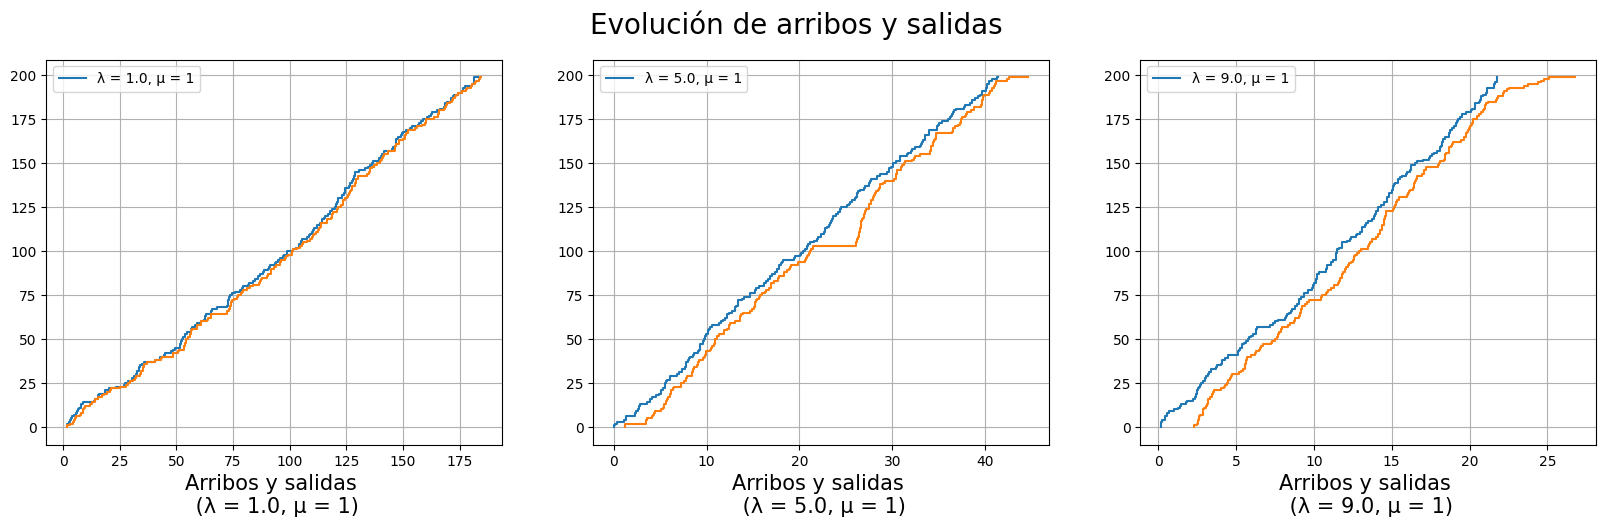

In [7]:
def graficar_arribos_salidas(m1, m2, m3):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    ax[0].step(x=m1.arribos, y=range(len(m1.arribos)))
    ax[0].step(x=m1.salidas, y=range(len(m1.salidas)))
    ax[1].step(x=m2.arribos, y=range(len(m2.arribos)))
    ax[1].step(x=m2.salidas, y=range(len(m2.salidas)))
    ax[2].step(x=m3.arribos, y=range(len(m3.arribos)))
    ax[2].step(x=m3.salidas, y=range(len(m3.salidas)))
    fig.suptitle("Evolución de arribos y salidas", fontsize=20)
    ax[0].set_xlabel(f'Arribos y salidas \n (λ = {m1.tasaArribos}, μ = {m1.tasaServicio})', fontsize=15)
    ax[1].set_xlabel(f'Arribos y salidas \n (λ = {m2.tasaArribos}, μ = {m2.tasaServicio})', fontsize=15)
    ax[2].set_xlabel(f'Arribos y salidas \n (λ = {m3.tasaArribos}, μ = {m3.tasaServicio})', fontsize=15)
    ax[0].legend([f'λ = {m1.tasaArribos}, μ = {m1.tasaServicio}'])
    ax[1].legend([f'λ = {m2.tasaArribos}, μ = {m2.tasaServicio}'])
    ax[2].legend([f'λ = {m3.tasaArribos}, μ = {m3.tasaServicio}'])
    ax[2].grid()
    ax[1].grid()
    ax[0].grid()
    plt.show()
    
graficar_arribos_salidas(metricasHist[0], metricasHist[4], metricasHist[8])

1.2. Densidad de los tiempos de servicio

Para las simulaciones seleccionadas en el punto anterior, graficamos la densidad de los tiempos de servicio. Verificamos que, para valores de λ muy superiores a la tasa de atención, los cuales se corresponden con una mayor cantidad de solicitudes en cola, los tiempos de servicio se acumulan en torno a 0.0, es decir, son menores que para valores de λ cercanos a la tasa de atención.

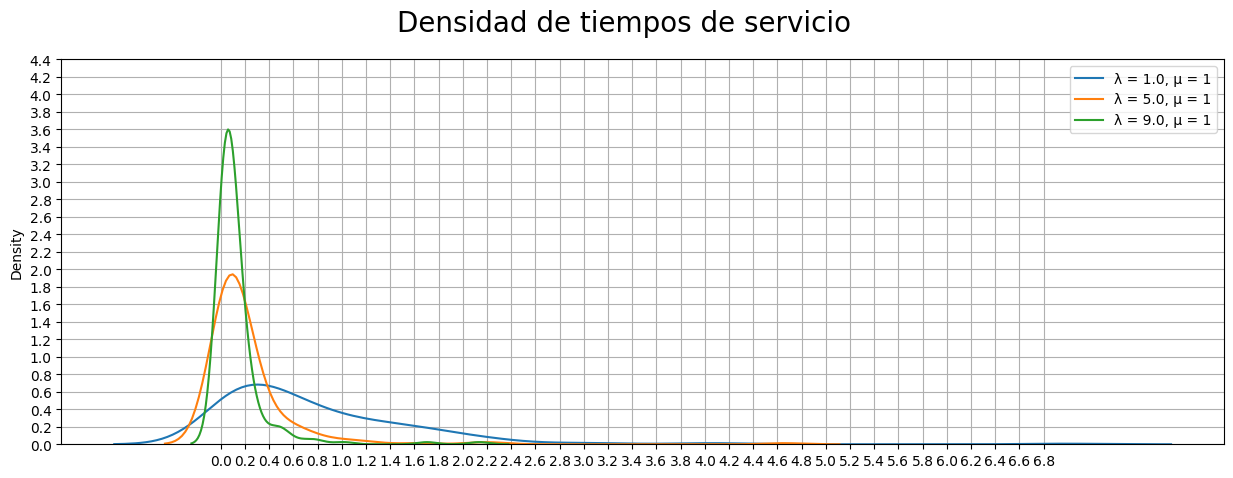

In [8]:
def graficar_densidad_tiempos_servicio(m1, m2, m3):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
    p = sns.kdeplot(m1.tiemposDeServicio,ax=ax)
    p = sns.kdeplot(m2.tiemposDeServicio,ax=ax)
    p = sns.kdeplot(m3.tiemposDeServicio,ax=ax)
    ax.legend([f'λ = {m1.tasaArribos}, μ = {m1.tasaServicio}', f'λ = {m2.tasaArribos}, μ = {m2.tasaServicio}', f'λ = {m3.tasaArribos}, μ = {m3.tasaServicio}'])
    ax.set_xticks(np.arange(0, 7, 0.2))
    ax.set_yticks(np.arange(0, 4.6, 0.2))
    ax.grid()
    #fig.tight_layout()
    fig.suptitle("Densidad de tiempos de servicio", fontsize=20)

graficar_densidad_tiempos_servicio(metricasHist[0], metricasHist[4], metricasHist[8])

2.) Resultados del modelo

2.1.) Relación entre la tasa de atención y la longitud de la cola.

Debido a la politica de priorización de solicitudes, el modelo predice que habrá una relación lineal entre la tasa de atención de solicitudes y el largo de la cola. A continuación graficamos la correspondencia entre ambas cantidades, para todas las simulaciones realizadas:

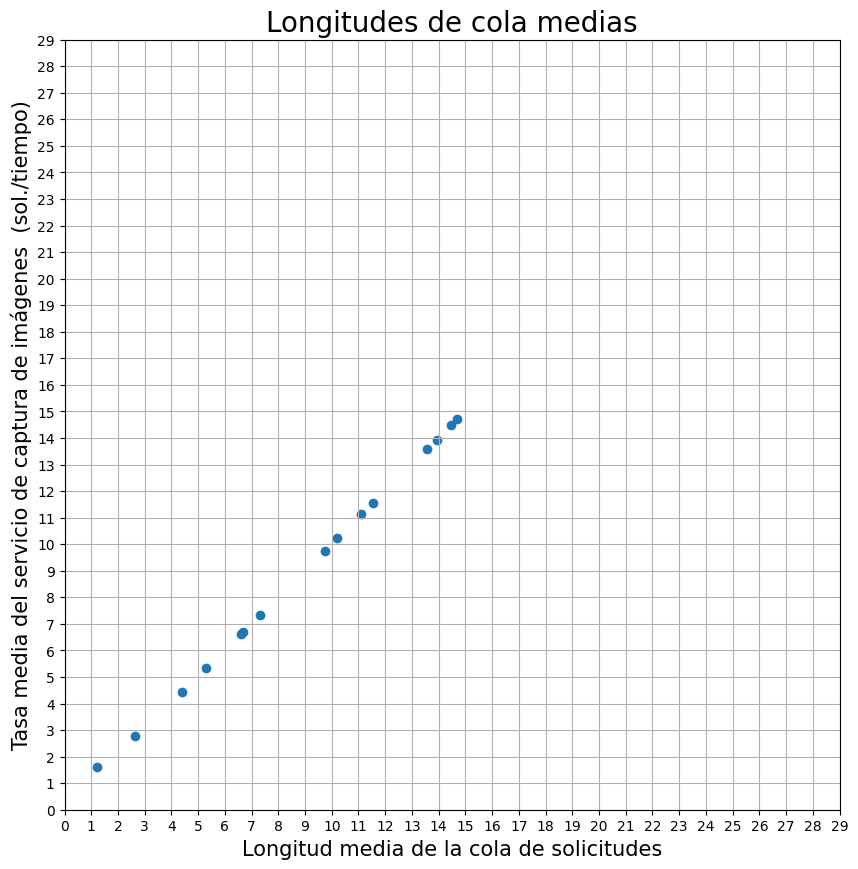

In [9]:
fig, ax5 = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax5.scatter(*zip(*longitudMediaTasaMedia))
ax5.set_xlabel('Longitud media de la cola de solicitudes', fontsize=15)
ax5.set_ylabel('Tasa media del servicio de captura de imágenes  (sol./tiempo)', fontsize=15)
ax5.set_title("Longitudes de cola medias", fontsize=20)
ax5.set_xticks(np.arange(0,30, 1))
ax5.set_yticks(np.arange(0,30, 1))
ax5.grid()

2.2) Probabilidades de las posibles longitudes de la cola

El modelo da una expresión para las probabilidades estacionarias de las longitudes de cola. 

$$p_n = \frac{(λ/μ_0)e^{-(λ/μ_0)}}{n!}  (n≥0)$$

Analizamos para los casos vistos anteriormente (λ=1.0, λ=5.0, λ=9.0) si la densidad de cantidad de solicitudes en cola obtenida de forma empírica se asemeja a los valores dados por el modelo.

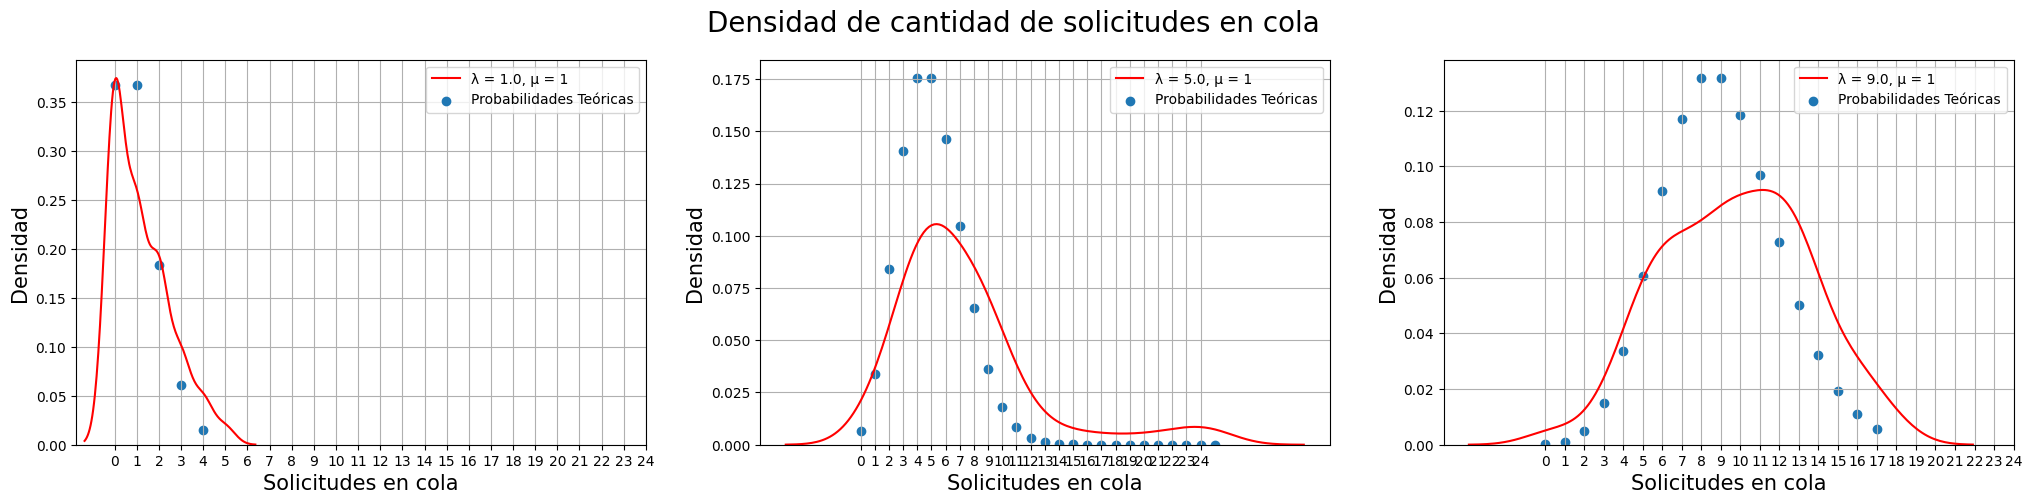

In [10]:
def grafico_probabilidades(m1, m2, m3):
    met = [m1, m2, m3]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
    for i in range(0, 3):
        p = sns.kdeplot(met[i].cantidadEnCola,ax=ax[i], c="red")
        ax[i].scatter(y=met[i].probabilidades, x=range(len(met[i].probabilidades)))
        ax[i].legend([f'λ = {met[i].tasaArribos}, μ = {met[i].tasaServicio}', 'Probabilidades Teóricas'])
        ax[i].set_xlabel('Solicitudes en cola', fontsize=15)
        ax[i].set_ylabel('Densidad', fontsize=15)
        ax[i].set_xticks(np.arange(0,25, 1))
        ax[i].grid()
    fig.suptitle("Densidad de cantidad de solicitudes en cola", fontsize=20)

grafico_probabilidades(metricasHist[0], metricasHist[4], metricasHist[8])

2.3) Longitud media de la cola y tiempo medio de espera

El tercer resultado es que el modelo da expresiones para la longitud media de la cola ($L_i$), y para el tiempo medio que una solicitud espera para ser atendida ($W$).

$$L_i = ∑{n  p_n}$$
$$$$
$$W = \frac{L_i}{λ} $$

Graficamos los valores teóricos y los obtenidos a partir de las simulaciones, esperando obtener una relacion lineal entre ellos:

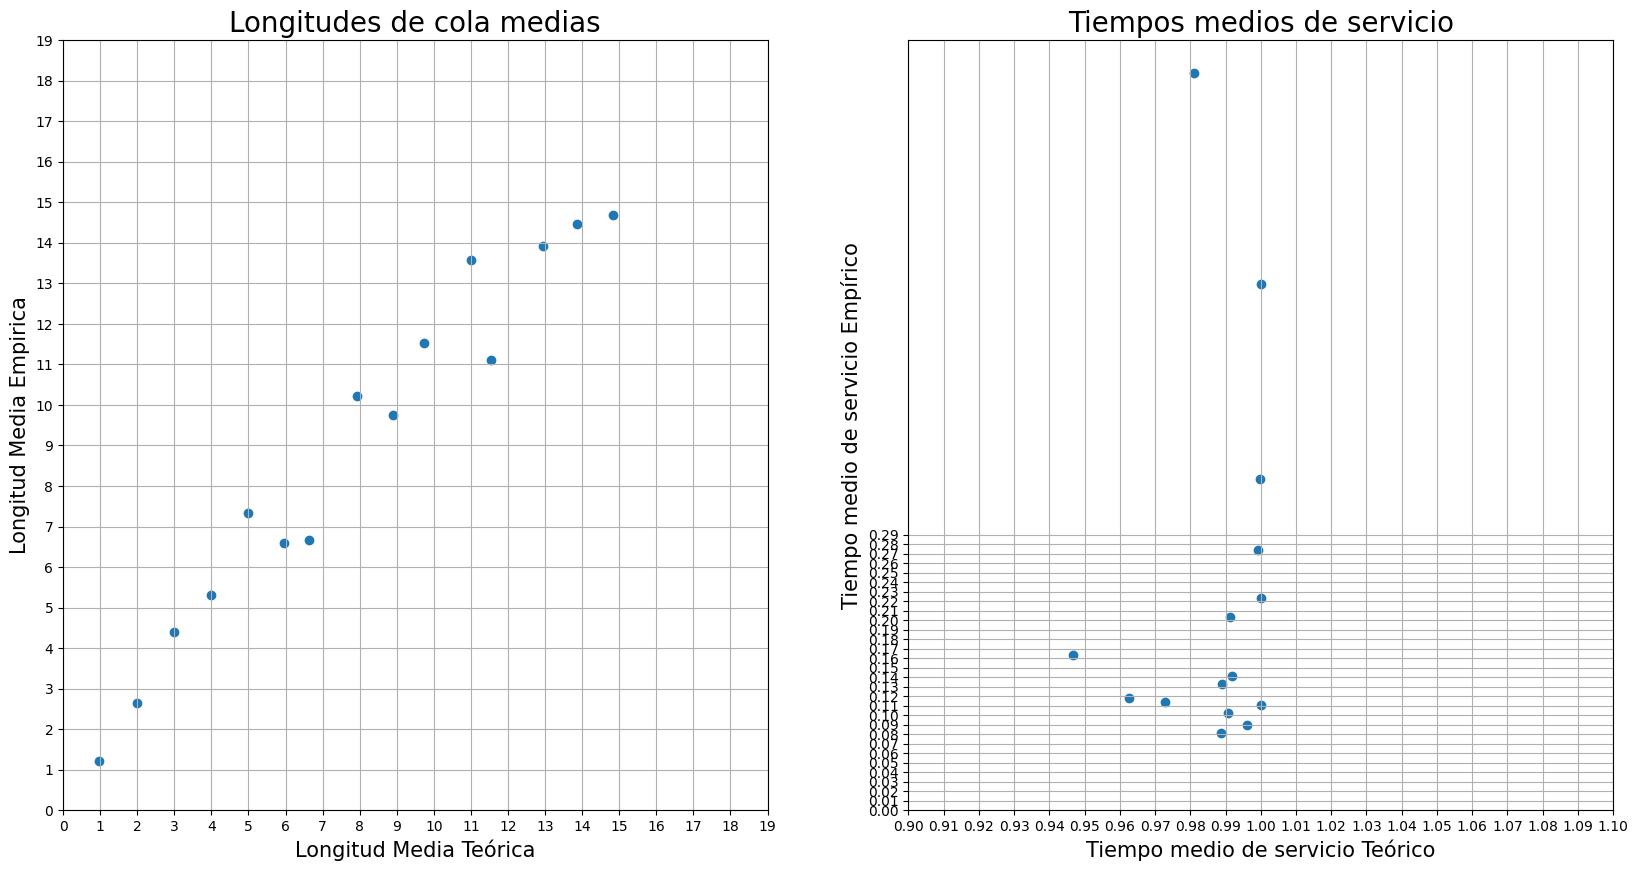

In [11]:
fig, ax6 = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax6[0].scatter(*zip(*longitudes))
ax6[0].set_xlabel('Longitud Media Teórica', fontsize=15)
ax6[0].set_ylabel('Longitud Media Empirica', fontsize=15)
ax6[0].set_title("Longitudes de cola medias", fontsize=20)
ax6[0].grid()
ax6[0].set_xticks(np.arange(0,20, 1))
ax6[0].set_yticks(np.arange(0,20, 1))
ax6[1].scatter(*zip(*tiempos))
ax6[1].set_xlabel('Tiempo medio de servicio Teórico', fontsize=15)
ax6[1].set_ylabel('Tiempo medio de servicio Empírico', fontsize=15)
ax6[1].set_title("Tiempos medios de servicio", fontsize=20)
ax6[1].grid()
ax6[1].set_xticks(np.arange(0.9,1.1, 0.01))
ax6[1].set_yticks(np.arange(0,0.3, 0.01))
plt.show()

---

# Ejercicio 3: Diseño del Web Service

In [20]:
from scipy.stats import expon, uniform
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from math import floor

sns.set(style="darkgrid")
params = {
    'axes.titlesize': 20,
    'axes.labelsize': 15,
    'legend.fontsize': 20,
    'figure.figsize': (10, 6),
}
pylab.rcParams.update(params)

In [21]:
class Consulta:
    def __init__(self, tiempo_arribo, duracion, tiempo_finalizacion_anterior):
        if tiempo_arribo < tiempo_finalizacion_anterior:
            self.duracion_espera = tiempo_finalizacion_anterior - tiempo_arribo
            self.tuvo_que_esperar = True
        else:
            self.duracion_espera = 0
            self.tuvo_que_esperar = False
                            
        self.tiempo_finalizacion = tiempo_arribo + duracion + self.duracion_espera

In [22]:
def simular_consultas(tiempos_de_arribo, duraciones):
    consultas = []

    # Uso -1 como tiempo de finalizacion del anterior para que empieze ni bien llega
    primera_consulta = Consulta(tiempos_de_arribo[0], duraciones[0], tiempo_finalizacion_anterior = -1)
    consultas.append(primera_consulta)

    for tiempo_arribo, duracion in zip(tiempos_de_arribo[1:], duraciones[1:]):
        consulta = Consulta(tiempo_arribo,
                        duracion, 
                        tiempo_finalizacion_anterior = consultas[-1].tiempo_finalizacion)
        consultas.append(consulta)
        
    tiempo_espera_total = 0
    cant_consultas_que_no_esperaron = 0
    for consulta in consultas:
        tiempo_espera_total += consulta.duracion_espera
        if not consulta.tuvo_que_esperar:
            cant_consultas_que_no_esperaron += 1

    return tiempo_espera_total, cant_consultas_que_no_esperaron

### Centralizado

In [23]:
def mostrar_resultados(titulo, tiempo_espera_total, cant_consultas_que_no_esperaron, cant_consultas):
    print(f"--------------{titulo}--------------")
    
    
    segundos = round(tiempo_espera_total / cant_consultas, 0)
    
    minutos = floor(segundos/60)
    if(minutos != 0):
        segundos = segundos % (minutos * 60)
    
    horas = floor(minutos/60)
    if(horas != 0):
        minutos = minutos % (horas * 60)

        
    dias = floor(horas/24)
    if(dias != 0):
        horas = horas % (dias * 24)
    
    print(f"\tEl tiempo de espera promedio fue ", end="")
    if(dias != 0):
        print(str(dias) + " Dias ", end="")
    if(horas != 0):    
        print(str(horas) + " Horas ", end="")
    if(minutos != 0):    
        print(str(minutos) + " Minutos ", end="")
    if(segundos != 0):    
        print(str(segundos) + " Segundos")
    
    
    print(f"\tEl {round(cant_consultas_que_no_esperaron/cant_consultas, 5)}% de las consultas no tuvo que esperar")

In [24]:
def simular_consultas_centralizado(cant_consultas, media_tiempos_de_arribo, media_duraciones_consultas):
    tiempos_de_arribo = expon.rvs(size=cant_consultas, scale=media_tiempos_de_arribo, random_state=10)
    duraciones = expon.rvs(size=cant_consultas, scale=media_duraciones_consultas, random_state=10)
    return simular_consultas(tiempos_de_arribo, duraciones)

In [25]:
t, f = simular_consultas_centralizado(100000, 4, 0.8)
mostrar_resultados("Base de datos central", t,f, 100000)

--------------Base de datos central--------------
	El tiempo de espera promedio fue 11 Horas 3 Minutos 16.0 Segundos
	El 2e-05% de las consultas no tuvo que esperar


### Distribuido

In [26]:
def simular_consultas_distribuido(cant_consultas, media_tiempos_de_arribo,
                                  media_duraciones_consultas1, media_duraciones_consultas2, p):
    tiempos_de_arribo = expon.rvs(size=cant_consultas, scale=media_tiempos_de_arribo, random_state=10)
    u = uniform.rvs(size=cant_consultas, random_state=10)
    
    tiempos_de_arribo1 = []
    tiempos_de_arribo2 = []
    
    for ui, tiempo_de_arribo in zip(u, tiempos_de_arribo):
        if p <= ui:
            tiempos_de_arribo1.append(tiempo_de_arribo)
        else:
            tiempos_de_arribo2.append(tiempo_de_arribo)
    
    
    duraciones1 = expon.rvs(size=len(tiempos_de_arribo1), scale=media_duraciones_consultas1, random_state=10)
    t1, f1 = simular_consultas(tiempos_de_arribo1, duraciones1)
    
    duraciones2 = expon.rvs(size=len(tiempos_de_arribo2), scale=media_duraciones_consultas2, random_state=10)
    t2, f2 = simular_consultas(tiempos_de_arribo2, duraciones2)
    
    return t1, f1, len(tiempos_de_arribo1), t2, f2, len(tiempos_de_arribo2)

In [27]:
t1, f1, l1, t2, f2, l2 = simular_consultas_distribuido(100000, 4, 0.7, 1, 0.7)
mostrar_resultados("Ambas bases distribuidas", t1 + t2, f2 + f2, l1 + l2)
mostrar_resultados("Base de datos distribuida 1", t1, f1, l1)
mostrar_resultados("Base de datos distribuida 2", t2, f2, l2)

--------------Ambas bases distribuidas--------------
	El tiempo de espera promedio fue 7 Horas 40 Minutos 21.0 Segundos
	El 4e-05% de las consultas no tuvo que esperar
--------------Base de datos distribuida 1--------------
	El tiempo de espera promedio fue 2 Horas 51 Minutos 34.0 Segundos
	El 7e-05% de las consultas no tuvo que esperar
--------------Base de datos distribuida 2--------------
	El tiempo de espera promedio fue 9 Horas 42 Minutos 30.0 Segundos
	El 3e-05% de las consultas no tuvo que esperar


### Modificando los parametros

In [28]:
def simular_variaciones(cantidades_consultas=[100000], 
                        medias_tiempos_de_arribo=[4],
                        medias_duraciones_consultas = [0.8],  
                        medias_duraciones_consultas1 = [0.7],
                        medias_duraciones_consultas2 = [1],
                        lista_p = [0.7]):

    tiempos_centralizado = []
    frecuencias_centralizado = []

    tiempos_distribuido = []
    frecuencias_distribuido = []
                         
    for cant_consultas in cantidades_consultas:
        for media_tiempos_de_arribo in medias_tiempos_de_arribo:
            for media_duraciones_consultas in medias_duraciones_consultas:
                for media_duraciones_consultas1 in medias_duraciones_consultas1:
                     for media_duraciones_consultas2 in medias_duraciones_consultas2:
                            for p in lista_p:
                                t, f = simular_consultas_centralizado(cant_consultas, media_tiempos_de_arribo, 
                                                                      media_duraciones_consultas)
                                tiempos_centralizado.append(t / cant_consultas)
                                frecuencias_centralizado.append(f /cant_consultas)
    
                                t1, f1, l1, t2, f2, l2  = simular_consultas_distribuido(cant_consultas, 
                                                                                        media_tiempos_de_arribo,
                                                                                        media_duraciones_consultas1,
                                                                                        media_duraciones_consultas2,
                                                                                        p)
    
                                tiempos_distribuido.append((t1 + t2) / (l1 + l2))
                                frecuencias_distribuido.append((f1 + f2) / (l1 + l2))
            
            
    return tiempos_centralizado, frecuencias_centralizado, tiempos_distribuido, frecuencias_distribuido 

In [29]:
def graficar_tiempo_espera(x, xlabel, tiempos_centralizado, tiempos_distribuido,
                         centralizado_es_referencia = False, distribuido_es_referencia = False):
    
    if centralizado_es_referencia:
        color_centralizado = 'b'
        linestyle_centralizado = '--'
    else:
        color_centralizado = 'bo'
        linestyle_centralizado = '-'
        
    if distribuido_es_referencia:
        color_distribuido = 'g'
        linestyle_distribuido = '--'
    else:
        color_distribuido = 'go'
        linestyle_distribuido = '-'
    
    plt.plot(x, tiempos_centralizado, color_centralizado, linestyle=linestyle_centralizado, label="Base centralizada")
    plt.plot(x, tiempos_distribuido, color_distribuido, linestyle=linestyle_distribuido, label="Bases distribuidas")
    plt.title(f"Tiempo de espera medio según\n{xlabel.lower()}")
    plt.xlabel(xlabel)
    plt.ylabel("Tiempo de espera medio")
    plt.legend()
    plt.show()

In [30]:
def graficar_fraccion_que_no_espero(x, xlabel, tiempos_centralizado, tiempos_distribuido,
    centralizado_es_referencia = False, distribuido_es_referencia = False):
    
    if centralizado_es_referencia:
        color_centralizado = 'b'
        linestyle_centralizado = '--'
    else:
        color_centralizado = 'bo'
        linestyle_centralizado = '-'
        
    if distribuido_es_referencia:
        color_distribuido = 'g'
        linestyle_distribuido = '--'
    else:
        color_distribuido = 'go'
        linestyle_distribuido = '-'
    
    plt.plot(x, tiempos_centralizado, color_centralizado, linestyle=linestyle_centralizado, label="Base centralizada")
    plt.plot(x, tiempos_distribuido, color_distribuido, linestyle=linestyle_distribuido, label="Bases distribuidas")
    plt.title(f"Fracción de solicitudes que no esperaron según\n{xlabel.lower()}")
    plt.xlabel(xlabel)
    plt.ylabel("Fracción de solicitudes que no esperaron")
    plt.legend()

#### Media del tiempo de arribo

In [31]:
medias_tiempos_de_arribo = range(1, 11)
tiempos_centralizado, frecuencias_centralizado, tiempos_distribuido, frecuencias_distribuido = simular_variaciones(
    medias_tiempos_de_arribo = medias_tiempos_de_arribo
)

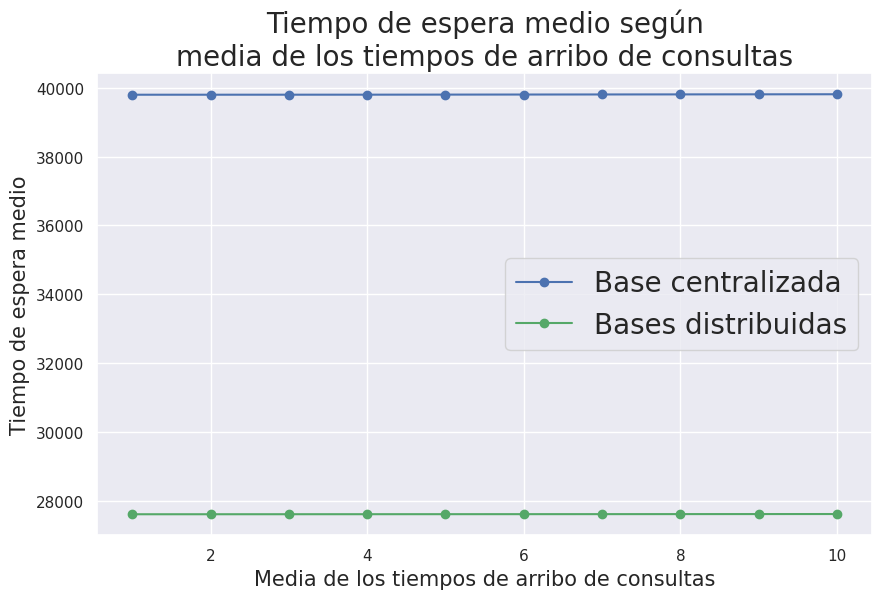

In [32]:
graficar_tiempo_espera(medias_tiempos_de_arribo, "Media de los tiempos de arribo de consultas",
                      tiempos_centralizado, tiempos_distribuido)

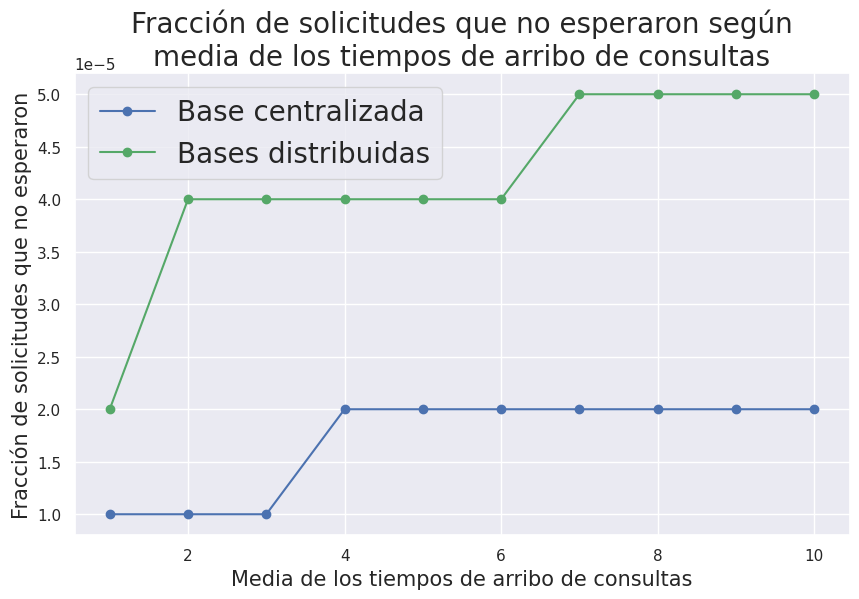

In [33]:
graficar_fraccion_que_no_espero(medias_tiempos_de_arribo, "Media de los tiempos de arribo de consultas",
                      frecuencias_centralizado, frecuencias_distribuido)

#### Lambda

In [34]:
lambda_l = []
for i in range(2, 20, 2):
    lambda_l.append(i/10)
tiempos_centralizado, frecuencias_centralizado, tiempos_distribuido, frecuencias_distribuido = simular_variaciones(
     medias_duraciones_consultas = lambda_l
)

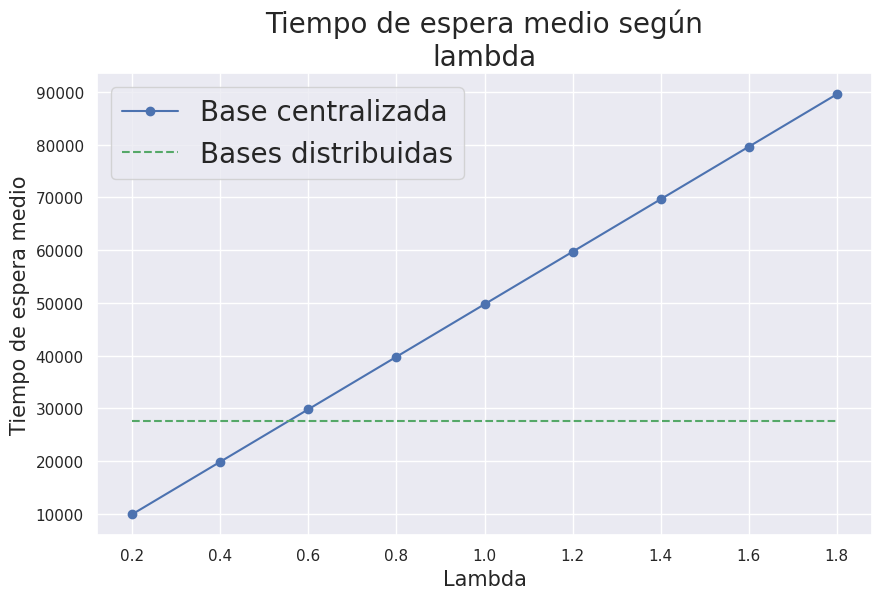

In [35]:
graficar_tiempo_espera(lambda_l, "Lambda",
                      tiempos_centralizado, tiempos_distribuido, distribuido_es_referencia = True)

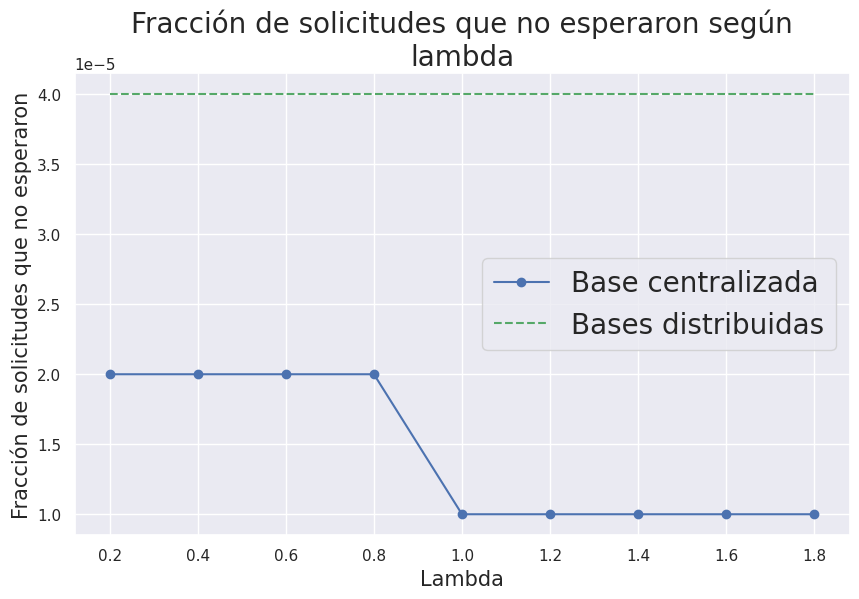

In [36]:
graficar_fraccion_que_no_espero(lambda_l, "Lambda",
                      frecuencias_centralizado, frecuencias_distribuido, distribuido_es_referencia = True)

#### Lambda1

In [37]:
lambda_1 = []
for i in range(2, 20, 2):
    lambda_1.append(i/10)
tiempos_centralizado, frecuencias_centralizado, tiempos_distribuido, frecuencias_distribuido = simular_variaciones(
     medias_duraciones_consultas1 = lambda_1
)

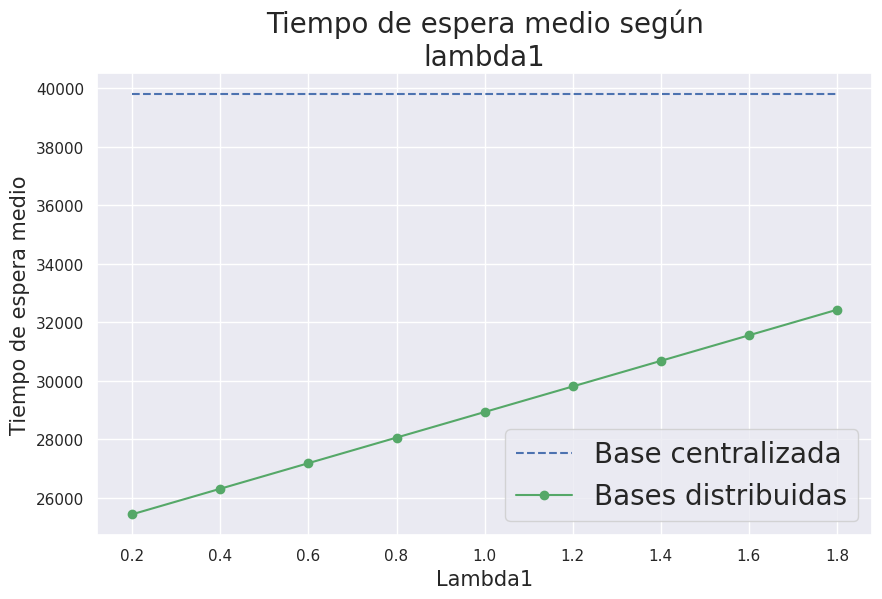

In [38]:
graficar_tiempo_espera(lambda_1, "Lambda1",
                      tiempos_centralizado, tiempos_distribuido, centralizado_es_referencia = True)

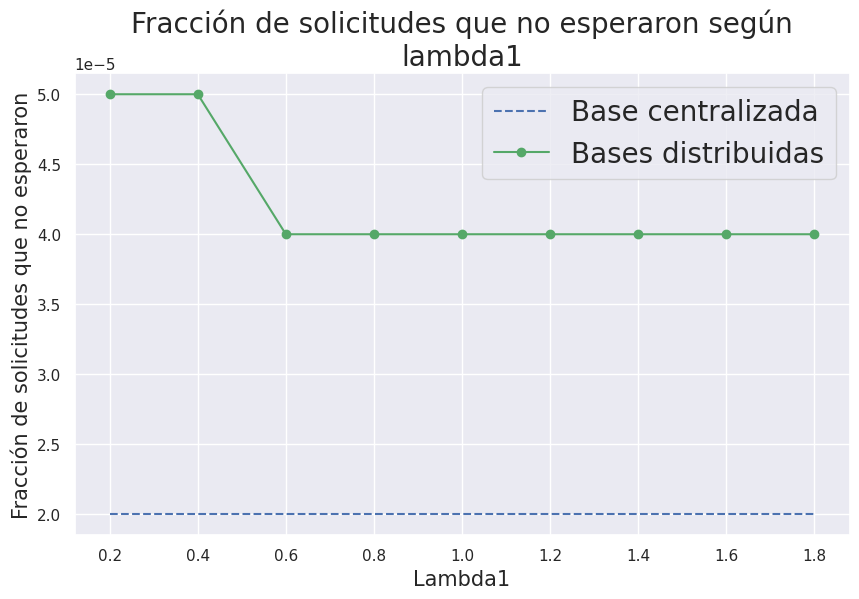

In [39]:
graficar_fraccion_que_no_espero(lambda_1, "Lambda1",
                      frecuencias_centralizado, frecuencias_distribuido, centralizado_es_referencia = True)

#### Lambda2

In [40]:
lambda_2 = []
for i in range(2, 20, 2):
    lambda_2.append(i/10)
tiempos_centralizado, frecuencias_centralizado, tiempos_distribuido, frecuencias_distribuido = simular_variaciones(
     medias_duraciones_consultas1 = lambda_2
)

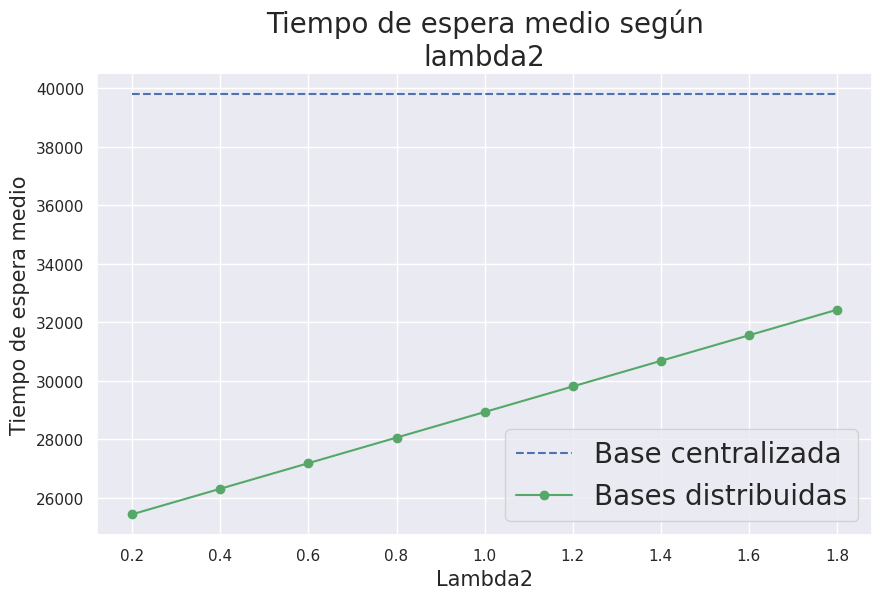

In [41]:
graficar_tiempo_espera(lambda_2, "Lambda2",
                      tiempos_centralizado, tiempos_distribuido, centralizado_es_referencia = True)

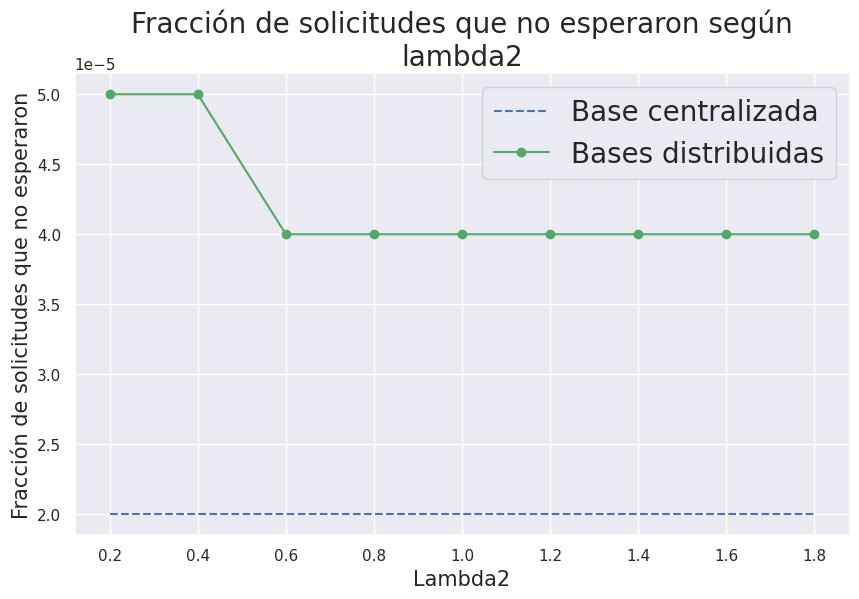

In [42]:
graficar_fraccion_que_no_espero(lambda_2, "Lambda2",
                      frecuencias_centralizado, frecuencias_distribuido, centralizado_es_referencia = True)

#### p

In [43]:
lista_p = []
for i in range(1, 10):
    lista_p.append(i/10)
tiempos_centralizado, frecuencias_centralizado, tiempos_distribuido, frecuencias_distribuido = simular_variaciones(
     lista_p = lista_p
)

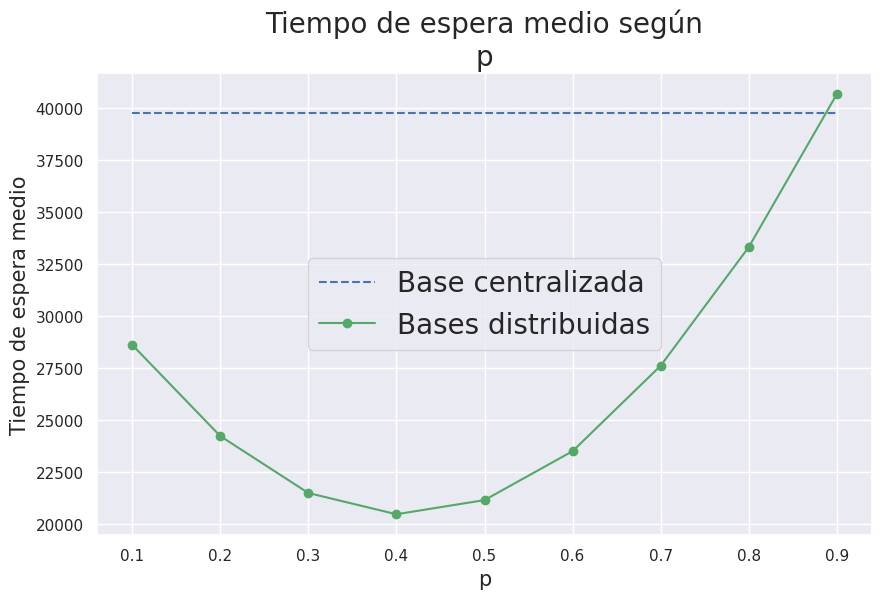

In [44]:
graficar_tiempo_espera(lista_p, "p",
                      tiempos_centralizado, tiempos_distribuido, centralizado_es_referencia = True)

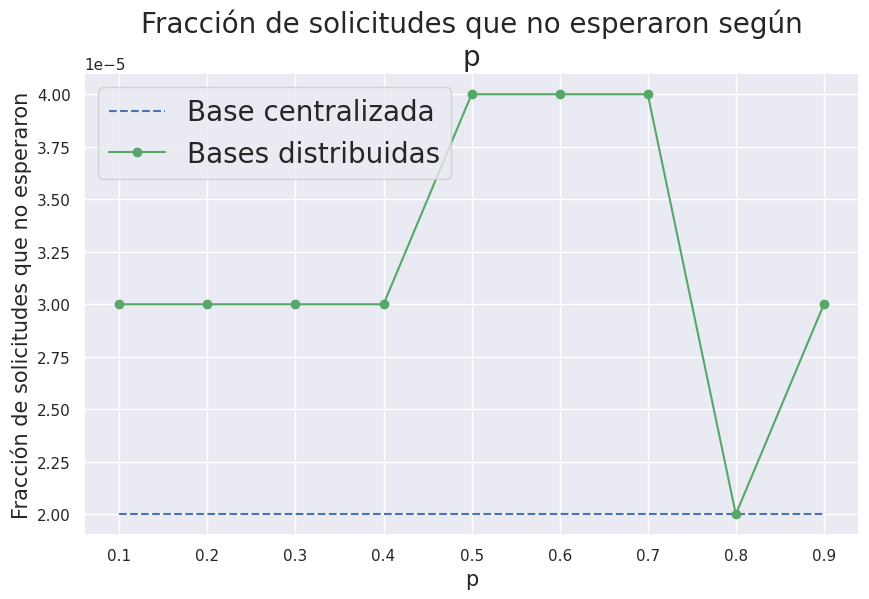

In [45]:
graficar_fraccion_que_no_espero(lista_p, "p",
                      frecuencias_centralizado, frecuencias_distribuido, centralizado_es_referencia = True)

# Ejercicio 4

a. Simular 1000 días completos de 24 hrs.

b. Para un día en particular graficar la cantidad de billetes en el cajero luego de cada transacción.

c. Calcular el tiempo medio que los clientes demoraron en el sistema (espera + utilización del cajero)

d. ¿Recomienda a la entidad que implemente el cambio de cajero?

In [5]:
from scipy.stats import expon, uniform
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from math import floor
from random import randint
import random
import matplotlib.pyplot as plt
from statistics import median


class Cajero:
    def __init__(self):
        self._billetes_en_cajero = 2000 # son todos de 100,  arranca el  día con todo el dinero posible
        self._capacidad_maxima = 2000  #billetes max q entran
        self._historial_dia_actual = []
        self._historial = []
        
    def nuevo_dia(self):
        self._billetes_en_cajero = 2000
        self._historial.append(self._historial_dia_actual)
        self._historial_dia_actual = []
    
    def retirar(self, cantidad_de_billetes):
        if self._billetes_en_cajero < cantidad_de_billetes:
            return False
        self._billetes_en_cajero -= cantidad_de_billetes
        self._historial_dia_actual.append(self._billetes_en_cajero)
        return True
        
    def depositar(self, cantidad_de_billetes):
        if self._billetes_en_cajero + cantidad_de_billetes > self._capacidad_maxima:
            return False
        self._billetes_en_cajero += cantidad_de_billetes
        self._historial_dia_actual.append(self._billetes_en_cajero)
        return True
        
    def historial(self):
        return self._historial
        
        
class Banco:
    def __init__(self):
        self._cajero = Cajero()
        self._minutos = 0 # al pasa 24 * 60 termina el día y restarteamos
        self._tiempos_de_espera = []
        self._clientes_perdidos = 0
        self._cantidad_de_clientes = 0
        self._cantidad_de_dias = 0
        # general
        self._minutos_en_hora = 24 *  60
        
    def _simular_dia(self):
        print(expon.rvs(size=3, random_state=10))
        # tarda en llegar n 
        
    def _grupo_cliente(self):
        return random.choices([1,2], weights=(75, 25))[0]
    
    def _resetear_dia(self):
        if self._minutos >= self._minutos_en_hora:
            self._minutos = self._minutos_en_hora - self._minutos
            self._cajero.nuevo_dia()
            self._cantidad_de_dias += 1
    
    def historial_de_cajero(self):
        return self._cajero.historial()
    
    def imprimir_estadisticas_de_simulacion(self):
        print(f'Pasaron {self._cantidad_de_dias} días')
        print(f'Cantidad de clientes: {self._cantidad_de_clientes}')
        print(f'Se perdieron {self._clientes_perdidos} clientes')
        porcentaje_clientes_perdidos = self._clientes_perdidos * 100 / self._cantidad_de_clientes
        print(f'Porcentaje de clientes perdidos: {floor(porcentaje_clientes_perdidos)}%')
        
    def imprimir_mediana(self):
        mediana = round(median(self._tiempos_de_espera), 2)
        print(f'Tiempo medio de espera: {mediana} minutos')
            
    def simular(self, dias, imprimir_estadisticas_clientes=False, imprimir_media_espera=False):
        tiempos_de_arribo = expon.rvs(size=144 * 60 * dias, scale=10, random_state=10)
        duraciones_1 = expon.rvs(size=len(tiempos_de_arribo), scale=1.5, random_state=10)
        duraciones_2 = expon.rvs(size=len(tiempos_de_arribo), scale=5, random_state=10)
        tiempo_de_arribo_personas = [tiempos_de_arribo[0]]
        for i, tiempo in enumerate(tiempos_de_arribo):
            if i > 0:
                tiempo_de_arribo_personas.append(tiempo + tiempo_de_arribo_personas[i-1])
            self._minutos += tiempo
            #duracion_de_persona = 0
            # Si es necesario se resetea el dia
            self._resetear_dia()
            if self._cantidad_de_dias == dias:
                break
            # Acciones de usuario
            if self._grupo_cliente() == 1: # Retiran
                cant_billetes = randint(3, 50)
                fue_exitoso = self._cajero.retirar(cant_billetes)
                self._clientes_perdidos += 0 if fue_exitoso else 1
                duracion_de_persona = duraciones_1[i] # lo que tardo en retirar
            else: # Depositan
                cant_billetes = randint(10, 110)
                fue_exitoso = self._cajero.depositar(cant_billetes)
                self._clientes_perdidos += 0 if fue_exitoso else 1
                duracion_de_persona = duraciones_2[i] # lo que tardo en depositar
            demora = 0
            if i > 0 and tiempo_de_arribo_personas[i] < tiempo_de_arribo_personas[i-1] + self._tiempos_de_espera[i-1]:
                demora = tiempo_de_arribo_personas[i-1] + self._tiempos_de_espera[i-1] - tiempo_de_arribo_personas[i]
                self._minutos += demora
            self._tiempos_de_espera.append(duracion_de_persona + demora)
            self._cantidad_de_clientes += 1
        if imprimir_estadisticas_clientes:
            self.imprimir_estadisticas_de_simulacion()
        if imprimir_media_espera:
            self.imprimir_mediana()

In [6]:

# Simular 1000 días
banco = Banco()
banco.simular(dias=1000, imprimir_estadisticas_clientes=True)
    

Pasaron 1000 días
Cantidad de clientes: 134850
Se perdieron 2466 clientes
Porcentaje de clientes perdidos: 1%


Cantidad de transacciones: 141


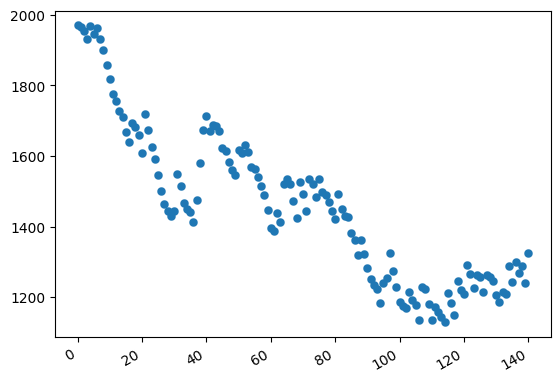

In [7]:
# cantidad de billetes en el cajero dps de cada transacción
banco = Banco()
banco.simular(dias=1000)
monto_en_cajero = banco.historial_de_cajero()[1]

# make up some data
x = [i for i,monto in enumerate(monto_en_cajero)]

# plot
plt.scatter(x,monto_en_cajero, linewidths = 0.1)
# beautify the x-labels
plt.gcf().autofmt_xdate()
print(f"Cantidad de transacciones: {len(monto_en_cajero)}")

In [8]:
#  Calcular el tiempo medio que los clientes demoraron en el sistema (espera + utilización del cajero)
banco = Banco()
banco.simular(dias=1000, imprimir_media_espera=True)

Tiempo medio de espera: 1.95 minutos


### ¿Recomienda a la entidad que implemente el cambio de cajero?

Sí, ya que el promedio de clientes perdidos es entre 1% y 2%, mientras que nos indicaron antes que la perdida de clientes era de una 20%